# Lab 4: Data Visualization and EDA

#### CPE232 Data Models

---

1. Load all Superstore datasets.

*Note: The same datasets used in Lab 3*

In [2]:
#%pip install missingno
#%pip install plotly
#%pip install -upgrade nbformat

In [ ]:
# Write your code here
import pandas as pd
import numpy as np
import missingno as msno

df_superstore_order = pd.read_csv('superstore_order.csv')
df_superstore_people = pd.read_csv('superstore_people.csv')
df_superstore_reutrn = pd.read_csv('superstore_return.csv')

2. Determine shape of each dataset (print out the results as well).

In [4]:
df_superstore_order.shape, df_superstore_people.shape, df_superstore_reutrn.shape

((8880, 21), (4, 2), (296, 2))

3. Show information of the dataset.


In [5]:
# Write your code here
print(df_superstore_order.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8880 non-null   int64  
 1   Order ID       8880 non-null   object 
 2   Order Date     8880 non-null   object 
 3   Ship Date      8880 non-null   object 
 4   Ship Mode      8880 non-null   object 
 5   Customer ID    8880 non-null   object 
 6   Customer Name  8880 non-null   object 
 7   Segment        8880 non-null   object 
 8   Country        8880 non-null   object 
 9   City           8880 non-null   object 
 10  State          8880 non-null   object 
 11  Postal Code    8880 non-null   int64  
 12  Region         8880 non-null   object 
 13  Product ID     8880 non-null   object 
 14  Category       8880 non-null   object 
 15  Sub-Category   8880 non-null   object 
 16  Product Name   8880 non-null   object 
 17  Sales          8880 non-null   float64
 18  Quantity

In [6]:
print(df_superstore_people.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  4 non-null      object
 1   Region  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes
None


In [7]:
print(df_superstore_reutrn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB
None


4. Are there any missing values? If so, in which column?

Ans: No, there have no any missing values in the dataset.

5.
- 5.1 List unique segments
- 5.2 List unique segments and their corresponding count
- 5.3 Create a pie chart to demonstrate unique segments and their count
- 5.4 Briefly describe what could be interpreted from this pie chart

*Note: please create additional cells to answer 5.2 - 5.3*

In [ ]:
# Write your code here (5.1)
df_superstore_order['Segment'].unique()


array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [9]:
# 5.2 List unique segments and their corresponding count
df_superstore_order['Segment'].value_counts()

Segment
Consumer       4613
Corporate      2673
Home Office    1594
Name: count, dtype: int64

In [ ]:
# (5.3) Create a pie chart to demonstrate unique segments and their count
import plotly.express as px

labels = df_superstore_order['Segment'].unique()
data = df_superstore_order['Segment'].value_counts()[labels]

fig = px.pie(values=data, names=labels, title='Unique Segments and their count')
fig.show()

Answer for the question 5.4

Ans: The pie chart shows that the Consumer segment has the highest count, followed by Corporate and Home Office segments.

6.
- 6.1 List unique states
- 6.2 List top-10 unique states and their corresponding count
- 6.3 Create a bar chart (vertical) to demonstrate the count of top-10 unique states
- 6.4 Based on 6.2, also include the total sales of these states (show your result as a dataframe)
- 6.5 Using the result from 6.4, if you were the owner of this superstore, what information could be interpreted from this result?

*Note: please create additional cells to answer 6.2 - 6.4*

In [11]:
# Write your code here (6.1)
df_superstore_order['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [12]:
# Write your code here (6.2)
t10 = df_superstore_order['State'].value_counts().sort_values(ascending=False)[:10].reset_index()

print(t10)

            State  count
0      California   1754
1        New York   1001
2           Texas    860
3    Pennsylvania    531
4      Washington    452
5        Illinois    427
6            Ohio    396
7         Florida    339
8        Michigan    230
9  North Carolina    229


In [13]:
# Write your code here (6.3)
import plotly.express as px

fig = px.bar(t10, x='State', y='count', title='Top 10 States by Order')
fig.show()

In [14]:
# Write your code here (6.4)
# include the total sales of these states (show your result as a dataframe)
t10_state = t10['State'].tolist()
t10_state_sales = df_superstore_order[df_superstore_order['State'].isin(t10_state)].groupby('State')['Sales'].sum().reset_index()
t10_state_sales

,State,Sales
0,California,399195.4555
1,Florida,84083.0880
2,Illinois,71456.1780
3,Michigan,62147.6960
4,New York,274866.8190
5,North Carolina,49962.1580
6,Ohio,67924.2140
7,Pennsylvania,103852.5210
8,Texas,147855.0282
9,Washington,124497.7780


Answer for the question 6.5

Ans: from the top 10 state total sales owners can see the highest sales state and lowest sales state and plan some startegy to increase the sales in the lowest sales state or can increase the sales in the highest sales state to increase the profit.

7.
- 7.1 List unique categories
- 7.2 Create a bar chart (horizontal) to demonstrate the proportion of these categories
- 7.3 Compute the ratio of these categories in percentage and print the results

*Note: please create additional cells to answer 7.2 - 7.3*

In [15]:
# Write your code here (7.1)
df_superstore_order['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [16]:
# Write your code here (7.2)
categeory_count = df_superstore_order['Category'].value_counts().reset_index()
print(categeory_count)
px.bar(categeory_count, x = 'count', y='Category', title='Category Count', orientation='h')

          Category  count
0  Office Supplies   5360
1        Furniture   1880
2       Technology   1640


In [17]:
# Write your code here (7.3)
total = df_superstore_order['Category'].count()

Furniture = df_superstore_order[df_superstore_order['Category'] == 'Furniture']['Category'].count()
Technology = df_superstore_order[df_superstore_order['Category'] == 'Technology']['Category'].count()
Office_Supplies = df_superstore_order[df_superstore_order['Category'] == 'Office Supplies']['Category'].count()

print(f"Ratio of each Category: \nFurniture: {(Furniture/total * 100):.2f} % \nTechnology: {(Technology/total * 100):.2f} % \nOffice Supplies: {(Office_Supplies/total * 100):.2f} %")

Ratio of each Category: 
Furniture: 21.17 % 
Technology: 18.47 % 
Office Supplies: 60.36 %


8. Update the type of all columns that contain dates to *datetime* and show information after an update.

In [18]:
# write your code here
for col in df_superstore_order.columns:
    if 'Date' in col:
        df_superstore_order[col] = pd.to_datetime(df_superstore_order[col], format='%d/%m/%Y')
        
df_superstore_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         8880 non-null   int64         
 1   Order ID       8880 non-null   object        
 2   Order Date     8880 non-null   datetime64[ns]
 3   Ship Date      8880 non-null   datetime64[ns]
 4   Ship Mode      8880 non-null   object        
 5   Customer ID    8880 non-null   object        
 6   Customer Name  8880 non-null   object        
 7   Segment        8880 non-null   object        
 8   Country        8880 non-null   object        
 9   City           8880 non-null   object        
 10  State          8880 non-null   object        
 11  Postal Code    8880 non-null   int64         
 12  Region         8880 non-null   object        
 13  Product ID     8880 non-null   object        
 14  Category       8880 non-null   object        
 15  Sub-Category   8880 n

In [19]:
df_superstore_order[[x for x in df_superstore_order.columns if 'Date' in x]].head()

,Order Date,Ship Date
0,2016-11-08,2016-11-11
1,2016-11-08,2016-11-11
2,2016-06-12,2016-06-16
3,2015-10-11,2015-10-18
4,2015-10-11,2015-10-18


9. Create a new column "Processing time day" to show number of days taken to ship an order and show your result in a dataframe format.

*Hint: The duration starts as soon as the item has been ordered and ends once the order has successfully shipped.*

In [ ]:
# write your code here
df_superstore_order['Processing time day'] = (df_superstore_order['Ship Date'] - df_superstore_order['Order Date']).dt.days
df_superstore_order['Processing time day'].head()

0    3
1    3
2    4
3    7
4    7
Name: Processing time day, dtype: int64

10. Based on the result in 9.
- 10.1 How many orders are there that take more than 5 days to process?
- 10.2 Show the top 5 rows (expected output should contain these columns: Order ID, Order Date, Ship Date, Processing time day, Quantity)
- 10.3 Plot the histogram based on the column Quantity

*Note: please create additional cells to answer 10.2 - 10.3*

In [ ]:
# Write your code here (10.1)
df_superstore_order[df_superstore_order['Processing time day'] > 5].shape
# so the answer is 1656

(1656, 22)

In [22]:
# write your code here (10.2)
df_superstore_order[['Order ID', 'Order Date', 'Ship Date', 'Processing time day', 'Quantity']].head(5)

,Order ID,Order Date,Ship Date,Processing time day,Quantity
0,CA-2016-152156,2016-11-08,2016-11-11,3,2
1,CA-2016-152156,2016-11-08,2016-11-11,3,3
2,CA-2016-138688,2016-06-12,2016-06-16,4,2
3,US-2015-108966,2015-10-11,2015-10-18,7,5
4,US-2015-108966,2015-10-11,2015-10-18,7,2


In [23]:
# write your code here (10.3)

px.histogram(df_superstore_order['Quantity'], x='Quantity', title='Quantity Distribution')

11. Total sales compare across different regions
  
- 11.1 Create a bar chart to visualize.

In [24]:
# Write your code here (11.1)
sales_region = df_superstore_order.groupby(by = 'Region').agg(Total_Sales = ('Sales', 'sum')).reset_index()
sales_region

,Region,Total_Sales
0,Central,434723.2222
1,East,603648.0590
2,South,361376.7910
3,West,645943.7905


In [25]:
px.bar(sales_region, x='Region', y='Total_Sales', title='Total Sales by Region')

- 11.2 How do total sales compare across different regions? Explain in as much detail as possible.
  
  Ans: The total sales in the West region is the highest with a total of 645943.79, followed by the East region with a total of 603648.06, then the Central region with a total of 434723.2222, and the lowest total sales in the South region with a total of 361376.79.

12.Which states have the highest number of returns? Use a horizontal bar chart.

Ans:

In [26]:
# Write your code here (12)
order_return = pd.merge(df_superstore_order, df_superstore_reutrn, on='Order ID', how='left')
order_return.fillna('No', inplace=True)
order_return.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Processing time day,Returned
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,No
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs ...,731.9400,3,0.00,219.5820,3,No
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,No
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,No
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2,0.20,2.5164,7,No


In [27]:
order_return.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Processing time day', 'Returned'],
      dtype='object')

In [28]:
order_return_state = order_return.groupby(by = 'State').agg(Total_Returned = ('Returned', lambda x: (x == 'Yes').sum())).sort_values(by = 'Total_Returned', ascending=False).reset_index()

#horizontal bar chart
px.bar(order_return_state, x='Total_Returned', y='State', title='Total Returned by State', orientation='h')

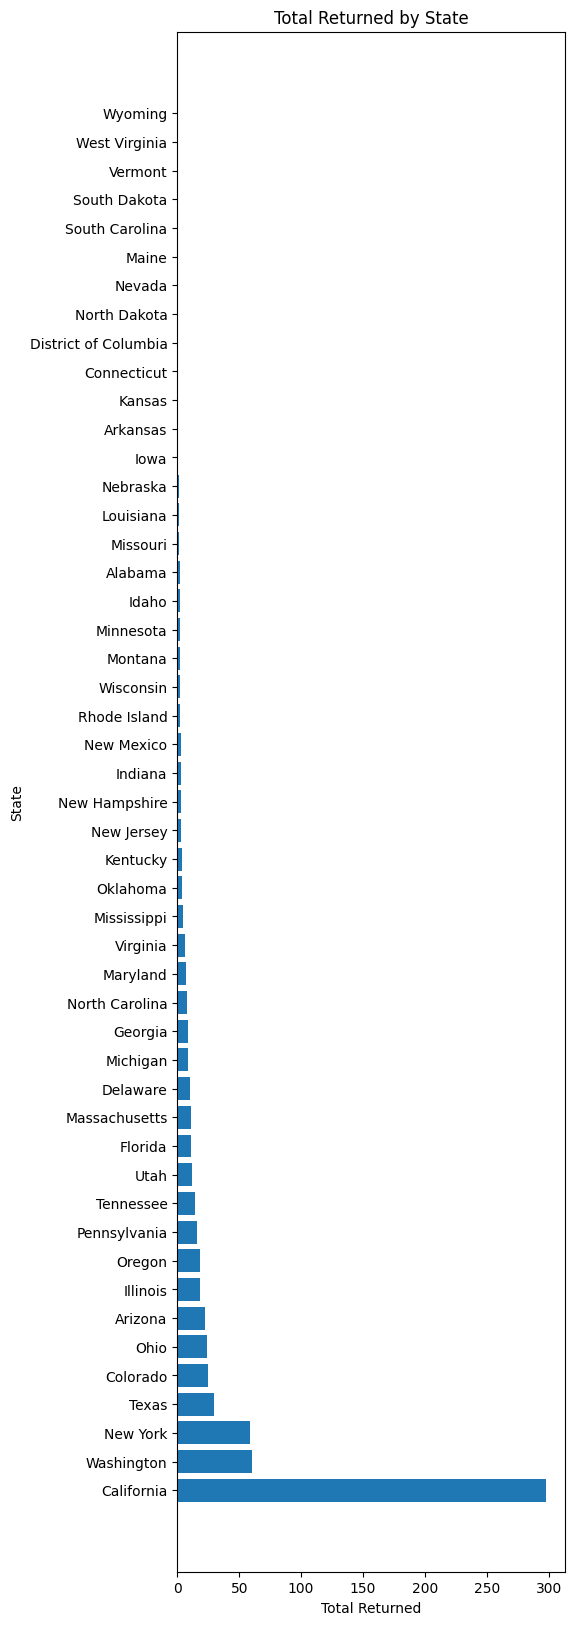

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 20))
plt.barh(order_return_state['State'], order_return_state['Total_Returned'])
plt.xlabel('Total Returned')
plt.ylabel('State')
plt.title('Total Returned by State')
plt.show()

13. What is the correlation between numerical variables in the superstore_order dataset? Use a heatmap
*Hint: Use seaborn to create a heatmap :)*

Text(0.5, 1.0, 'Correlation Matrix')

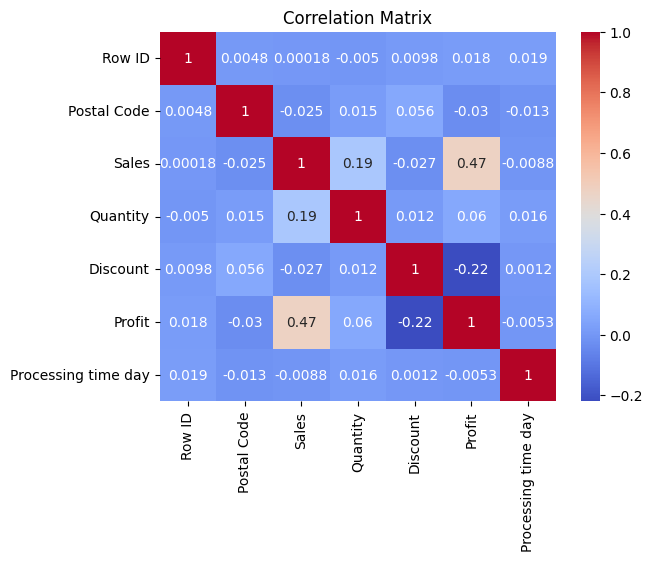

In [48]:
# Write your code here (13)
import seaborn as sns

numeric = df_superstore_order.select_dtypes(include=['number']).columns
corr = df_superstore_order[numeric].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')


14. Create a USA State-Level Choropleth Map to visualize total sales per state.

*   The darkest color represents the highest total sales.
*   The lightest color represents the lowest total sales.
*   Use a continuous gradient scale (e.g., dark blue to light blue, dark red to light red, or any custom gradient of your choice).

*Hint: Use plotly.express*

In [ ]:
# Write your code here (14) Create a USA State-Level Choropleth Map to visualize total sales per state.
import plotly.express as px
state_sales = df_superstore_order.groupby(by = 'State').agg(Total_Sales = ('Sales', 'sum')).reset_index()
state_sales.head(10)

,State,Total_Sales
0,Alabama,19272.4900
1,Arizona,32990.1060
2,Arkansas,9427.4400
3,California,399195.4555
4,Colorado,31080.8060
5,Connecticut,12829.0570
6,Delaware,26379.4290
7,District of Columbia,2865.0200
8,Florida,84083.0880
9,Georgia,47940.1900


In [ ]:
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Convert Full State Names to Abbreviations
state_sales['State'] = state_sales['State'].map(us_state_abbrev)

fig = px.choropleth(locations=state_sales['State'], locationmode='USA-states', color=state_sales['Total_Sales'], scope='usa', title='Total Sales per State', color_continuous_scale='blues')
fig.show()

  14.2 Answer the following questions:
1.   Which state has the highest total sales?
2.   How do sales anomalies affect the gradient color shading on the map?
3.   If you change the color scale, does it impact readability? Why or why not?

Ans:


1.  CA: California
2.  Sales anomalies affect the gradient color shading on the map because it will make the map harder to read and interpret.
3.   Yes, it will impact readability because the color scale will make the map more readable and easier to interpret. If the color scale is not chosen correctly, the map will be harder to interpret and understand.



15. Create a box plot to compare the different shipping modes based on total profit.

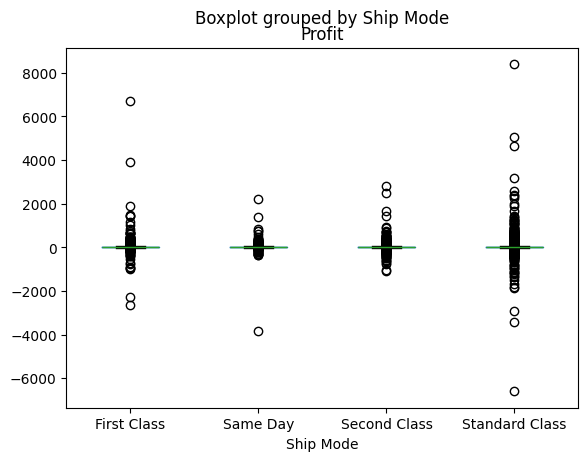

In [33]:
#Write your code here (15)

profit_shipMode = df_superstore_order[['Ship Mode', 'Profit']]

profit_shipMode.boxplot(by='Ship Mode', column='Profit', grid=False)
plt.show()

15.2 Which shipping mode has the highest median profit?

Ans: First Class

[BONUS 20 pts] Determine the percentage of customers who:
- B1)returned the product once
- B2) returned the product at least once
- B3) never returned the product
- Finally, Plot a comparison of B2 and B3

*Note: please create additional cells to answer the above points*

In [46]:
# Write your code here
Returned = order_return[order_return['Returned'] == 'Yes'].groupby('Customer ID').agg(return_count = ('Returned', 'count')).reset_index()
Returned_once = Returned[Returned['return_count'] == 1].shape[0]
Returned_atleast_once = Returned[Returned['return_count'] >= 1].shape[0]
Returned_never = order_return[order_return['Returned'] == 'No']['Customer ID'].unique().shape[0]

Returned_once_ratio = Returned_once / (Returned_once + Returned_atleast_once + Returned_never) * 100
Returned_atleast_once_ratio = Returned_atleast_once / (Returned_once + Returned_atleast_once + Returned_never) * 100
Returned_never_ratio = Returned_never / (Returned_once + Returned_atleast_once + Returned_never) * 100

Returned_once_ratio, Returned_atleast_once_ratio, Returned_never_ratio

(5.794392523364486, 20.747663551401867, 73.45794392523365)

In [47]:
# plot a comparison returned at least once, and never returned customers
px.pie(values=[Returned_atleast_once_ratio, Returned_never_ratio], names=['At least Once', 'Never'], title='Comparison of Returned at least Once and Never Returned Customers')